# Clustering Crypto

In [24]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Fetching Cryptocurrency Data

In [25]:
# Use the following endpoint to fetch json data
url = "https://min-api.cryptocompare.com/data/all/coinlist"

In [26]:
import urllib.request, json 
with urllib.request.urlopen("https://min-api.cryptocompare.com/data/all/coinlist") as url:
    data = json.loads(url.read().decode())

In [27]:
# Create a DataFrame 
# HINT: You will need to use the 'Data' key from the json response, then transpose the DataFrame.
df = pd.DataFrame.from_dict(data, orient='columns')
df1 = df['Data']
df1.T

42      {'Id': '4321', 'Url': '/coins/42/overview', 'I...
300     {'Id': '749869', 'Url': '/coins/300/overview',...
365     {'Id': '33639', 'Url': '/coins/365/overview', ...
404     {'Id': '21227', 'Url': '/coins/404/overview', ...
433     {'Id': '926547', 'Url': '/coins/433/overview',...
                              ...                        
OAX     {'Id': '180013', 'Url': '/coins/oax/overview',...
CRO     {'Id': '929418', 'Url': '/coins/cro/overview',...
ZUNA    {'Id': '944742', 'Url': '/coins/zuna/overview'...
APP     {'Id': '944744', 'Url': '/coins/app/overview',...
ENS     {'Id': '944364', 'Url': '/coins/ens/overview',...
Name: Data, Length: 7362, dtype: object

In [28]:
# Alternatively, use the provided csv file:
from pathlib import Path
file_path = Path("Resources/crypto_data.csv")


# Create a DataFrame
coin_list =pd.read_csv(file_path)
coin_list

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [29]:
coin_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


### Data Preprocessing

In [30]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
coin_list.drop(axis=1, columns='Unnamed: 0', inplace=True)
coin_list 

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1247,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [108]:
# Keep only cryptocurrencies that are trading
active_trades = coin_list.loc[coin_list['IsTrading'] == True]
active_trades

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [130]:
# Keep only cryptocurrencies with a working algorithm
active_trades.loc[active_trades['Algorithm'] != None]

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [110]:
# Remove the "IsTrading" column
x_trade =active_trades.drop(axis=1, columns='IsTrading')
x_trade

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
1243,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,SHA-256,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [111]:
# Remove rows with at least 1 null value
x_trade.dropna(axis = 0, how='any', inplace = True)
x_trade

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [116]:
# Remove rows with cryptocurrencies having no coins mined
coin_mined =x_trade.loc[coin_list['TotalCoinsMined'] != 0]
coin_mined

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [117]:
# Drop rows where there are 'N/A' text values

# check if 'N/A' values are present
df = coin_mined[coin_mined.values == 'N/A']
df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply


In [118]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
df1 =coin_mined['CoinName']
coins_name=pd.DataFrame(data=df1, index=None, columns=None, dtype=None, copy=None)
coins_name

,CoinName
0,42 Coin
2,404Coin
5,EliteCoin
7,Bitcoin
8,Ethereum
...,...
1238,ZEPHYR
1242,Gapcoin
1245,Beldex
1246,Horizen


In [119]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
coin_frame =coin_mined.drop(columns='CoinName')
coin_frame

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [120]:
coin_frame.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [121]:
# Create dummy variables for text features
coin_cat = pd.get_dummies(coin_frame[['Algorithm', 'ProofType', 'TotalCoinSupply']], drop_first=True)
coin_cat

,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,Algorithm_CryptoNight,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
# Standardize data
data_scalar = StandardScaler()
coin_scaled = data_scalar.fit_transform(coin_cat)


### Reducing Dimensions Using PCA

In [158]:
# Use PCA to reduce dimensions to 3 principal components

pca = PCA(n_components=3)
df_pca = pca.fit_transform(coin_scaled)

# Create a DataFrame with the principal components data

df_pca2 = pd.DataFrame(
    data=df_pca, columns=["principal component 1", "principal component 2", 'principal component 3']
)
df_pca2.head()


,principal component 1,principal component 2,principal component 3
0,-0.116948,0.077752,-0.010679
1,-0.112494,0.070698,-0.007396
2,0.112112,-0.007975,-0.147803
3,-0.273770,0.036177,-0.078567
4,-0.274443,0.091923,-0.064714


### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [124]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca2)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

C:\Users\bodem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



:Curve   [k]   (inertia)

Running K-Means with `k=<your best value for k here>`

In [180]:
# Initialize the K-Means model

model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_pca2)

# Predict clusters
predictions = model.predict(df_pca2)

# Create a new DataFrame including predicted clusters and cryptocurrencies features
coin_frame["Class"] = model.labels_



join_df = coin_frame[[ "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "Class"]]

clustered_df =pd.concat([coins_name, df_pca2, join_df])
clustered_df

,CoinName,principal component 1,principal component 2,principal component 3,Class,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined
0,42 Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,404Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,EliteCoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ethereum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1238,NaN,NaN,NaN,NaN,0.0,SHA-256,DPoS,2000000000,2.000000e+09
1242,NaN,NaN,NaN,NaN,0.0,Scrypt,PoW/PoS,250000000,1.493105e+07
1245,NaN,NaN,NaN,NaN,0.0,CryptoNight,PoW,1400222610,9.802226e+08
1246,NaN,NaN,NaN,NaN,0.0,Equihash,PoW,21000000,7.296538e+06


### Visualizing Results

#### 3D-Scatter with Clusters

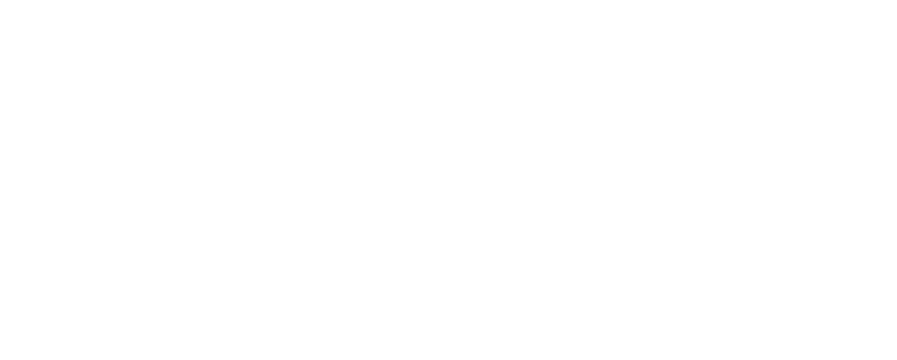

In [178]:
# # Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(data_frame=clustered_df, hover_name="CoinName", hover_data=["Algorithm"], width=800 )
fig.update_layout(legend=dict(x=0, y=1))
fig.show()



#### Table of Tradable Cryptocurrencies

In [179]:
# Table with tradable cryptos
clustered_df.hvplot.table(columns=["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "Class"])

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [154]:
# Print the total number of tradable cryptocurrencies
clustered_df['CoinName'].count()

533

In [153]:
clustered_df.dtypes

CoinName            object
Algorithm           object
ProofType           object
TotalCoinSupply     object
TotalCoinsMined    float64
Class              float64
dtype: object

#### Scatter Plot with Tradable Cryptocurrencies

In [176]:
# Scale data to create the scatter plot


In [175]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
clustered_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", hover_cols=["CoinName"])

:Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)